<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Настя, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
</div>

# Проект "Телеком"

##  Прогнозирования оттока клиентов для "Ниединогоразрыва.ком"

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг заказчика

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### План проекта

1. Подготовка данных. 
- Проверить данные на пропуски, дубликаты, "подозрительные значения". 
- Привести все данные к нужным типам при необходимости.
- Преобразовать категориальные признаки(например, наличие услуги) в численные. 
- Составить единую таблицу фичей (информация о договоре, клиенте, интернет-услугах и услугах телефонии) и целевого признака (столбец 'EndDate').
2. Исследовательский анализ. 
- Посмотреть на сбалансированность классов (ушедших/не ушедших клиентов в нашей выборке). 
- Посмотреть на расспределения и взаимосвязи признаков, возможно удаление сильно коррелирующих фичей или составление разных наборов фичей для тестирования на них моделей.
3. Выбор моделей. 
- Обучить на валидационной выборке разные модели, например,линейная регрессия, DecisionTree, Random Forest и т.д. 
- Подбор оптимальный гиперпараметров для моделей. 
4. Сравнить эффективность и скорость разных моделей на тестовой выборке.

### Вопросы к встрече 

Общие вопросы:
- Где и как планируется использоваться модель? 
- Есть ли у заказчика требования по скорости прогнозирования потенциально потенциально уходящего клиента? 
- Есть ли у заказчика, какие-то свои предположения, какие данные о клиенте могут играть решающую роль для его ухода? Или интересует ли его какая-то конкретная информация? Например, разница оттока клиентов стационарной или интернет связи?

Частные вопросы:
- Что такое TotalCharges? Можем ли мы пропуски в этой переменной заменить 0, тк клиент ничего не платил? Значит ли это, что он платит помесячно?

Описание полей данных:
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – безналичный расчет,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

# Подготовка данных

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [107]:
from catboost import CatBoostRegressor, Pool, EFstrType


In [108]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics  import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from catboost import CatBoostClassifier
from scipy import stats as st

In [110]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Ок, данные на базе)
</div>

### Contract

In [111]:
contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [112]:
print(contract.info())
print(contract.describe())
print(contract.customerID.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
0


У BeginDate и EndDate тип object, хотя это даты, чтобы нам было удобнее с ними работать приведем их к типу datetime64.

In [113]:
contract.loc[:, ['BeginDate', 'EndDate']] = pd.concat((pd.to_datetime(s, errors='coerce')
                                                         for s in [contract.BeginDate, contract.EndDate]), axis=1)  
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


У нас есть даты расторжения договора некоторыми пользователями, что и явдяется нашим целевым признаком, который мы хотим предсказывать. Для удобства создадим отдельный столбец для него - churn, где разметим нулями и единицами ушел человек или нет. 

In [114]:
contract.loc[:, 'churn'] = contract.EndDate.notna().astype(int)

In [115]:
contract.head(6)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.5,1


<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, есть целевая)
</div>

In [116]:
contract['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

Можно видеть, что наблюдений по пользователям, которые не рассторгали договор почти в 3 раза больше. Запомним об этом так как возможно стоит попробовать сбалансировать классы для более эффективного обучения моделей.

У нас есть дата начала и окончания пользования услугами нашей компании, но нет данных о суммарном количестве дней, которое с нами провел пользователь. Предположительно это может быть полезный признак для предсказания оттока, возможно, есть какой-то временной промежуток, после которого пользователи начинают отказываться от наших услуг. Чтобы проверить это создадим новый столбец days_of_use. Для этого из даты конца вычтим дату начала использования услуг и приведем полученные дни к типу int.

In [117]:
end = contract.BeginDate.max()

In [118]:
contract['days_of_use'] = (contract.EndDate.mask(contract.EndDate.isna(), end) - contract.BeginDate)
contract['days_of_use']= contract['days_of_use'].dt.days.astype(int)

In [119]:
contract.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days_of_use
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,0,1036


<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>тааак, и новый интересный фактор
</div>

Безналичный расчет, тип и способ оплаты явно категориальные данные и для удобства можем сразу преобразуем их. Можно было бы использовать ohe преобразование с помощью функции get_dummies, но мы видим способов оплаты у нас больше 2, поэтому лучше в данном случае закодируем категории вручную.  

In [120]:
contract.loc[:, 'lessBilling'] = contract.PaperlessBilling.map({'Yes': 1, 'No': 0})
contract.drop('PaperlessBilling', axis=1, inplace=True)

In [121]:
contract.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [122]:
contract.loc[:, 'Payment_type'] = contract.Type.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
contract.drop('Type', axis=1, inplace=True)

In [123]:
contract.loc[:, 'Payment_method'] = contract.PaymentMethod.map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})
contract.drop('PaymentMethod', axis=1, inplace=True)

In [124]:
contract.head(2)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,0,31,1,0,0
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.5,0,1036,0,1,1


<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>понял, ок.
</div>

Пропусков в данных нет. Но TotalCharges, почему-то имеет тип object, MonthlyCharges float64, нам скорее всего нужно обращаться с этими переменными как с числовыми, но точность как у float64 не нужна. Так что изменим их тип на int.

Только для переменной TotalCharges у нас есть строчки, где значение переменной пробел. Посмотрим на данные этих пользователей, чтобы понять в чем дело.

In [125]:
contract.query("TotalCharges == ' '") 

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method
488,4472-LVYGI,2020-02-01,NaT,52.55,,0,0,1,2,2
753,3115-CZMZD,2020-02-01,NaT,20.25,,0,0,0,2,1
936,5709-LVOEQ,2020-02-01,NaT,80.85,,0,0,0,2,1
1082,4367-NUYAO,2020-02-01,NaT,25.75,,0,0,0,2,1
1340,1371-DWPAZ,2020-02-01,NaT,56.05,,0,0,0,2,3
3331,7644-OMVMY,2020-02-01,NaT,19.85,,0,0,0,2,1
3826,3213-VVOLG,2020-02-01,NaT,25.35,,0,0,0,2,1
4380,2520-SGTTA,2020-02-01,NaT,20.00,,0,0,0,2,1
5218,2923-ARZLG,2020-02-01,NaT,19.70,,0,0,1,1,1
6670,4075-WKNIU,2020-02-01,NaT,73.35,,0,0,0,2,1


У них у всех дата начала пользования услугами 2020-02-01, то есть как раз дата выгрузки нашего датасета, те это пользователи, которые только начали пльзоваться услугами в месяц, когда мы решили провести наше исследование. Следовательно, скорее всего их TotalCharges равны MonthlyCharges. 

<div class="alert alert-success">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>да!!! это новички, чётко раскрутила...
</div>

In [126]:
contract['TotalCharges']= np.where(contract['TotalCharges'].isin([' ']), contract['MonthlyCharges'], contract['TotalCharges'])

In [127]:
contract.query("BeginDate == '2020-02-01'").head(3)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method
488,4472-LVYGI,2020-02-01,NaT,52.55,52.55,0,0,1,2,2
753,3115-CZMZD,2020-02-01,NaT,20.25,20.25,0,0,0,2,1
936,5709-LVOEQ,2020-02-01,NaT,80.85,80.85,0,0,0,2,1


In [128]:
contract['MonthlyCharges'] = contract['MonthlyCharges'].astype(int)
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

In [129]:
contract['TotalCharges'] = contract['TotalCharges'].astype(int)

Посмотрим на расспределения расходов в нашей выборке.

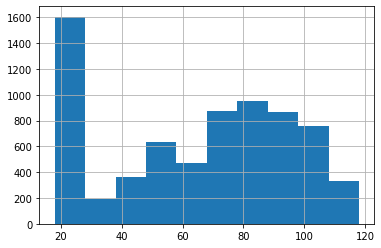

In [130]:
contract['MonthlyCharges'].hist()

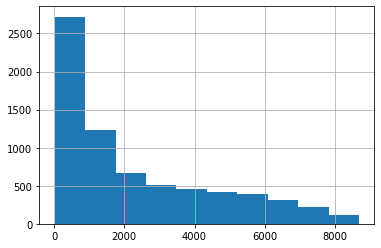

In [131]:
contract['TotalCharges'].hist()

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ещё, гистограмма 'MonthlyCharges' показывает бимодальность - несколько горбов) Это говорит о том, что в самой выборке есть несколько однородных выборок. Здесь, может быть, это завязано на количество услуг, или "болатый/бедный" клиент. В общем - можно попробовать выделить ещё фактор, который как раз объясняет эту бимодальность.
</div>

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Да, есть такое, посмотрим в исследовательском анализе, когда все данные о клиентах будут в единой таблице :)
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br/>ок)
</div>

In [132]:
contract.query("MonthlyCharges ==18").head(3)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method
11,7469-LKBCI,2018-10-01,NaT,18,326,0,488,0,2,3
1151,8992-CEUEN,2020-01-01,NaT,18,18,0,31,0,0,0
1156,0621-CXBKL,2015-09-01,NaT,18,1005,0,1614,0,2,1


In [133]:
contract.query("TotalCharges ==18").head(3)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method
1151,8992-CEUEN,2020-01-01,NaT,18,18,0,31,0,0,0
1654,2967-MXRAV,2020-01-01,NaT,18,18,0,31,0,1,1
4939,9975-SKRNR,2020-01-01,NaT,18,18,0,31,0,0,1


Расспределение расходов месячных трат близко к нормальному, но есть выбивающееся значение. Много пользователей, у которые потратили только 18 рублей. Покак не понятно, что это объеденияет этих пользователей, может мы сможем это понять из других датасетов. На всякий случай запомним об этом наблюдении.

### Personal

In [134]:
personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [135]:
print(personal.info())
print(personal.describe())
print(personal.customerID.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
0


Типы адекватны, пропусков и дубликатов нет. Но можно видеть много кагориальных данных только с 2 категорями, так что можно их изменить с помощью техники OHE.

In [136]:
non_dummy_cols = ['customerID'] 
dummy_cols = list(set(personal.columns) - set(non_dummy_cols))
personal_ohe = pd.get_dummies(personal, columns=dummy_cols, drop_first=True)
personal_ohe.head(3)

,customerID,Partner_Yes,gender_Male,SeniorCitizen_1,Dependents_Yes
0,7590-VHVEG,1,0,0,0
1,5575-GNVDE,0,1,0,0
2,3668-QPYBK,0,1,0,0


<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br/>ок
</div>

### Internet

In [137]:
internet.head(3)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


In [138]:
print(internet.info())
print(internet.describe())
print(internet.customerID.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB
None
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     4277-UDIEF     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2         

Ситуация аналогичная personal датафрейму, все хорошо, но много категориальных признаков, которые лучше перекодировать по принципу ohe.

In [139]:
non_dummy_cols = ['customerID'] 
dummy_cols = list(set(internet.columns) - set(non_dummy_cols))
internet_ohe = pd.get_dummies(internet, columns=dummy_cols, drop_first=True)
internet_ohe.head(3)

,customerID,StreamingTV_Yes,StreamingMovies_Yes,DeviceProtection_Yes,OnlineBackup_Yes,TechSupport_Yes,OnlineSecurity_Yes,InternetService_Fiber optic
0,7590-VHVEG,0,0,0,1,0,0,0
1,5575-GNVDE,0,0,1,0,0,1,0
2,3668-QPYBK,0,0,0,1,0,1,0


### Phone

In [140]:
phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [141]:
print(phone.info())
print(phone.describe())
print(phone.customerID.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB
None
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     4277-UDIEF            No
freq             1          3390
0


В этом датафрейме все в порядке. Типы данных адекватны, пропусков и дубликатов нет.

In [142]:
non_dummy_cols = ['customerID'] 
dummy_cols = list(set(phone.columns) - set(non_dummy_cols))
phone_ohe = pd.get_dummies(phone, columns=dummy_cols, drop_first=True)
phone_ohe.head(3)

,customerID,MultipleLines_Yes
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0


<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Удался первичный аналитический осмотр!
</div>

### Формирование таблицы признаков

In [143]:
df = pd.DataFrame()  
df = contract.merge(personal_ohe, on='customerID', how='left')
df = df.merge(internet_ohe, on='customerID', how='left')
df = df.merge(phone_ohe, on='customerID', how='left')
df.head(3)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method,...,SeniorCitizen_1,Dependents_Yes,StreamingTV_Yes,StreamingMovies_Yes,DeviceProtection_Yes,OnlineBackup_Yes,TechSupport_Yes,OnlineSecurity_Yes,InternetService_Fiber optic,MultipleLines_Yes
0,7590-VHVEG,2020-01-01,NaT,29,29,0,31,1,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
1,5575-GNVDE,2017-04-01,NaT,56,1889,0,1036,0,1,1,...,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,53,108,1,61,1,0,1,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID                     7043 non-null object
BeginDate                      7043 non-null datetime64[ns]
EndDate                        1869 non-null datetime64[ns]
MonthlyCharges                 7043 non-null int64
TotalCharges                   7043 non-null int64
churn                          7043 non-null int64
days_of_use                    7043 non-null int64
lessBilling                    7043 non-null int64
Payment_type                   7043 non-null int64
Payment_method                 7043 non-null int64
Partner_Yes                    7043 non-null uint8
gender_Male                    7043 non-null uint8
SeniorCitizen_1                7043 non-null uint8
Dependents_Yes                 7043 non-null uint8
StreamingTV_Yes                5517 non-null float64
StreamingMovies_Yes            5517 non-null float64
DeviceProtection_Yes           5517 non-null float64
O

Не по всем пользователям есть данные во всех таблицах, будем считать, что они не пользуются какими-то услугами и пропуски можно заменить 0. Это не единственный вариант решения такой проблемы, поэтому если мы не получим нужно качество модели можно попробовать что-то еще придумать.

In [145]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID                     7043 non-null object
BeginDate                      7043 non-null datetime64[ns]
EndDate                        7043 non-null object
MonthlyCharges                 7043 non-null int64
TotalCharges                   7043 non-null int64
churn                          7043 non-null int64
days_of_use                    7043 non-null int64
lessBilling                    7043 non-null int64
Payment_type                   7043 non-null int64
Payment_method                 7043 non-null int64
Partner_Yes                    7043 non-null uint8
gender_Male                    7043 non-null uint8
SeniorCitizen_1                7043 non-null uint8
Dependents_Yes                 7043 non-null uint8
StreamingTV_Yes                7043 non-null float64
StreamingMovies_Yes            7043 non-null float64
DeviceProtection_Yes           7043 non-null float64
OnlineBac

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>супер! есть контакт.
</div>

# Исследовательский анализ

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


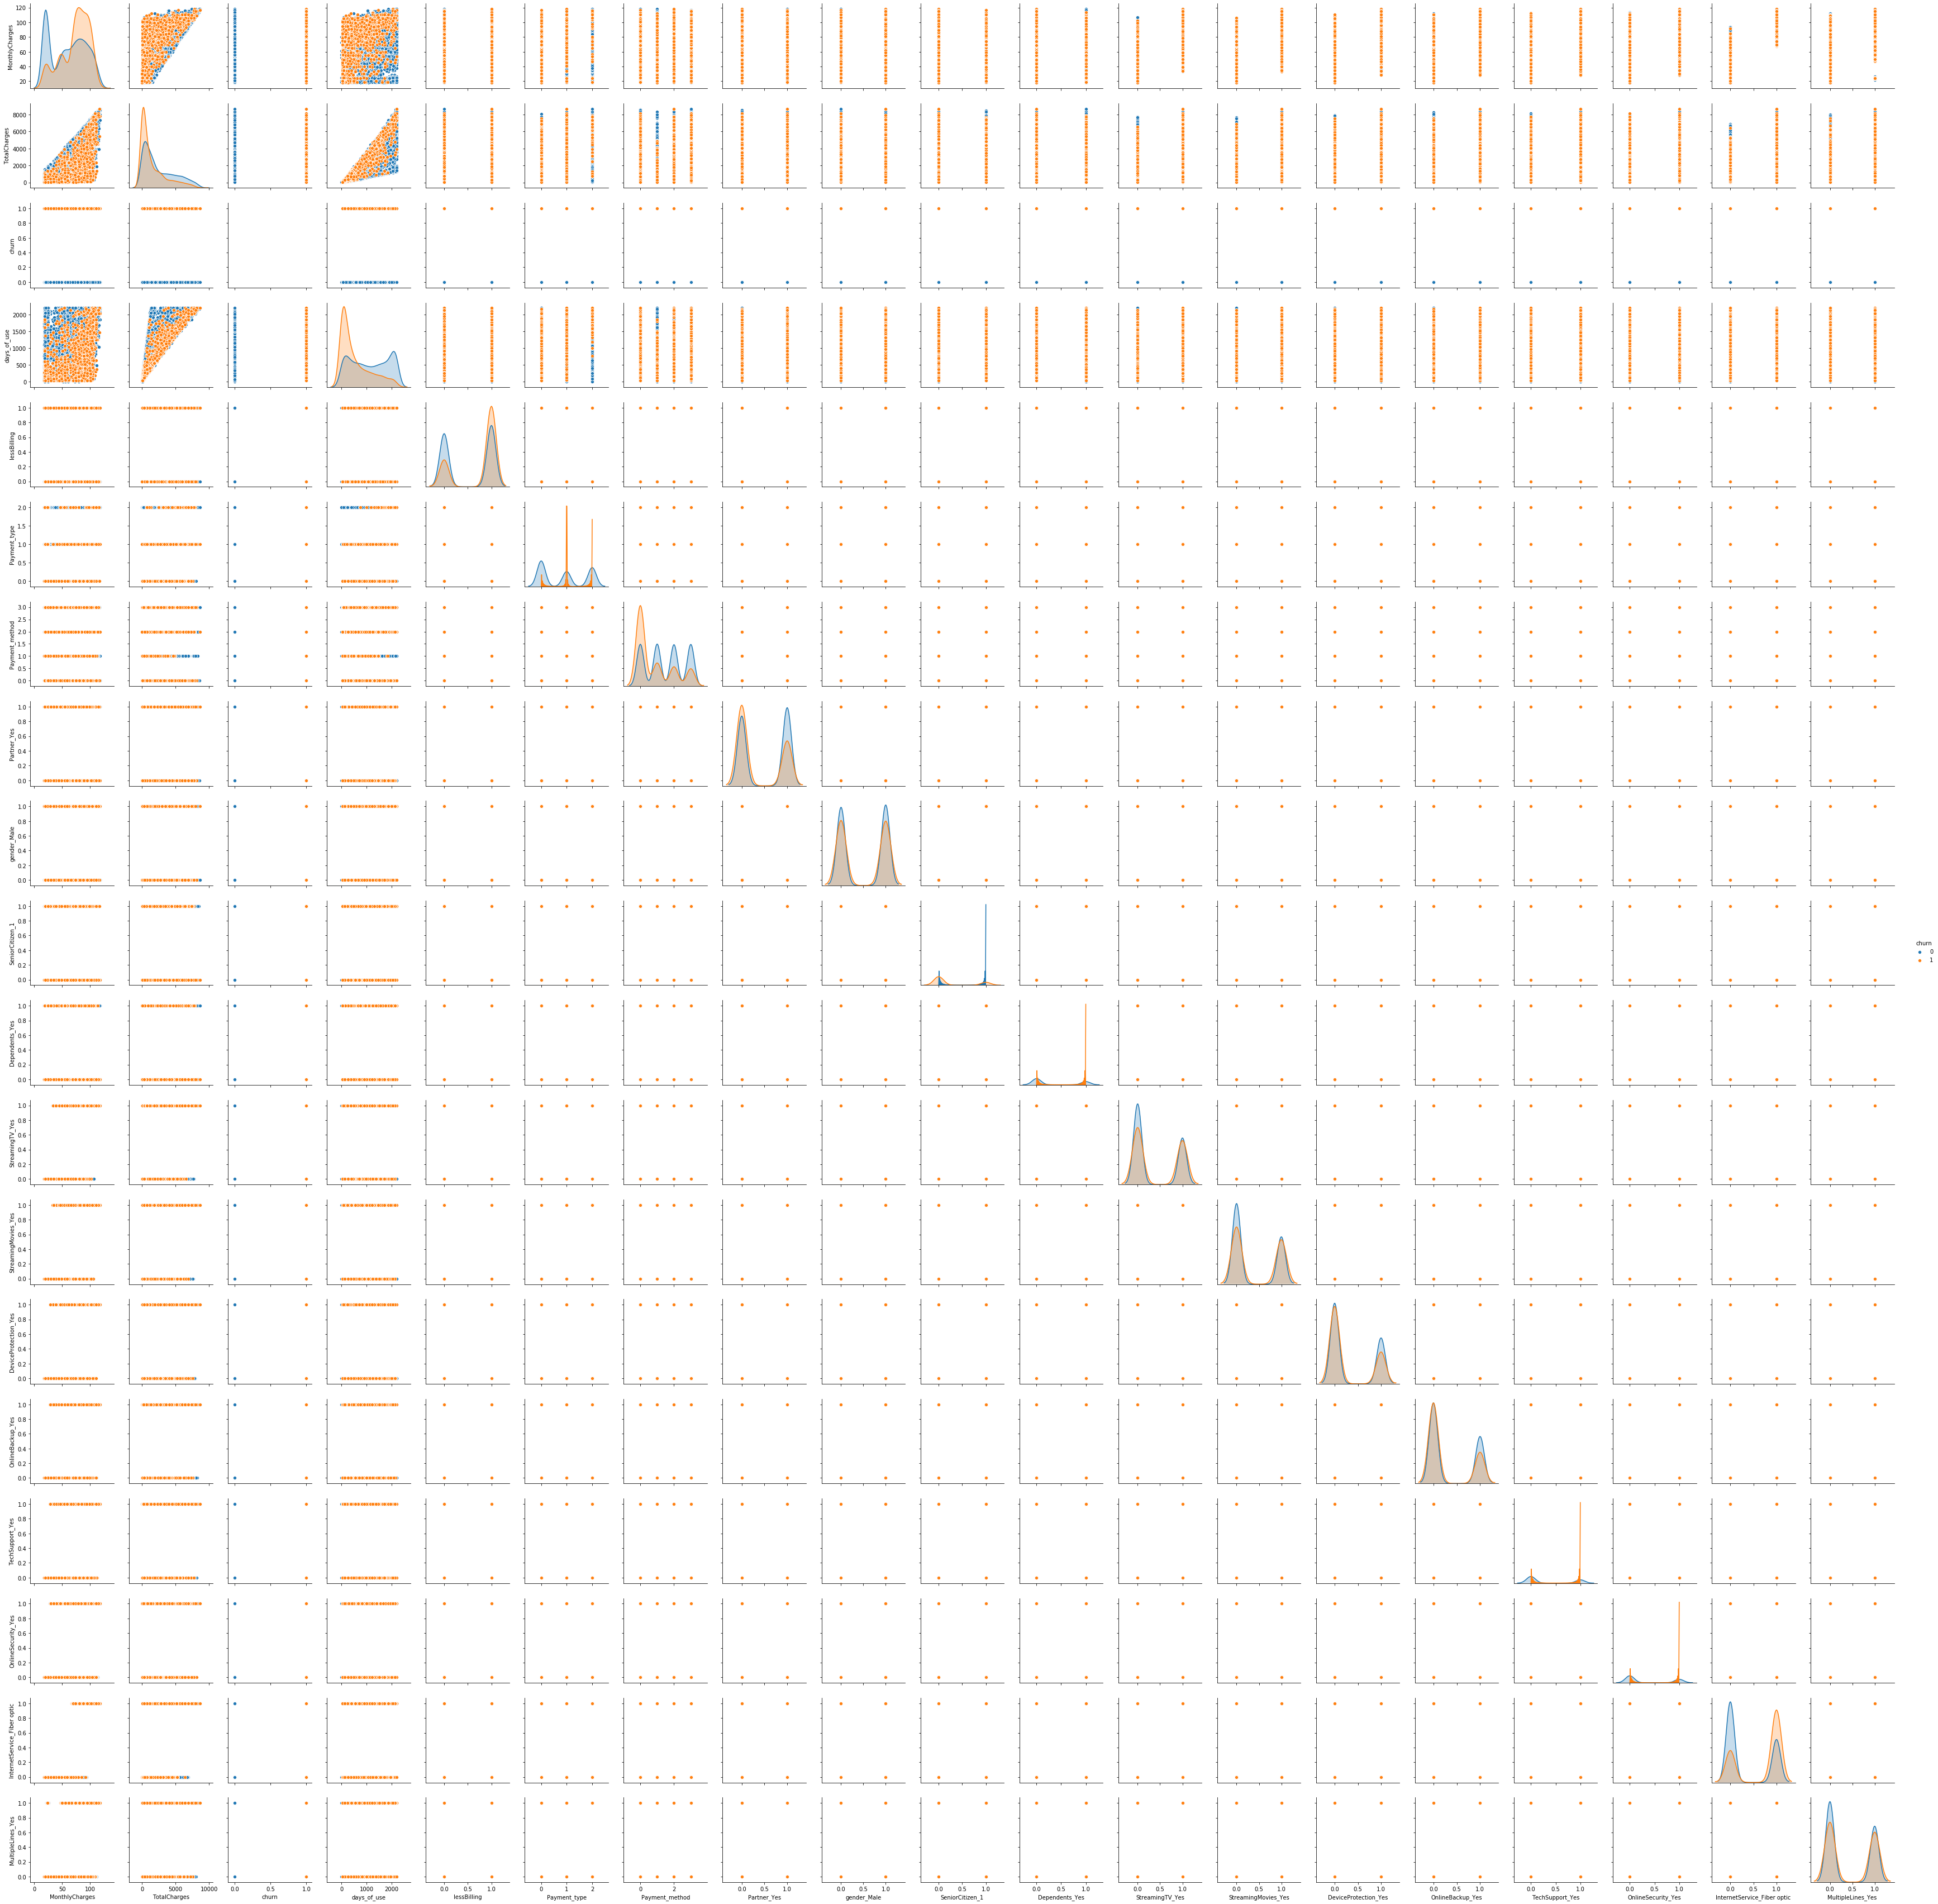

In [146]:
sns.pairplot(df, hue='churn')

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>не смогу сказать, что информативно получилось)
</div>

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Ну не симпатично, но можно поразглядывать диагональ с расспределениями и увидеть, где есть разница в оттоке клиентов))) Но да, симпатичнее такие графики выглядят для колличественных признаков так что можно оставить только их.
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>в точку)
</div>

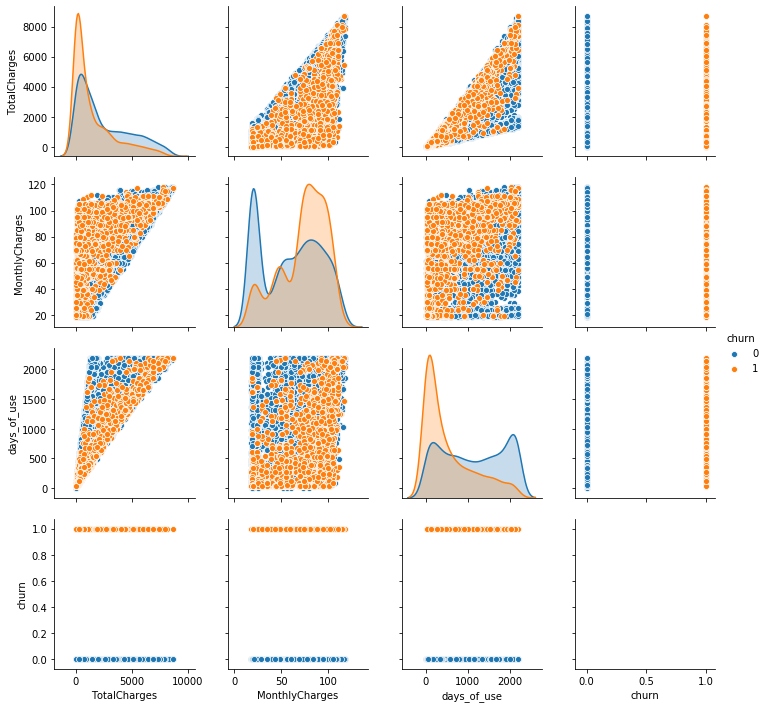

In [147]:
sns.pairplot(df[['TotalCharges', 'MonthlyCharges','days_of_use','churn']], hue='churn')

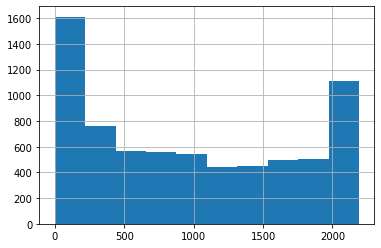

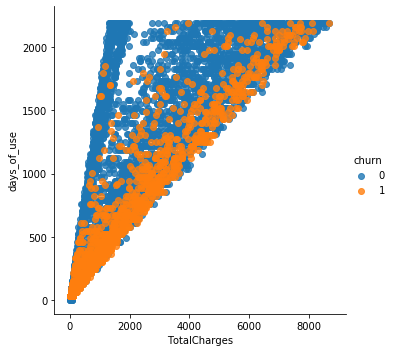

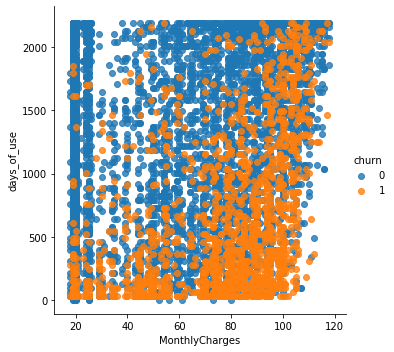

In [148]:
df.days_of_use.hist()
ax=sns.lmplot(x='TotalCharges', y='days_of_use',hue='churn' , data=df, fit_reg=False)
ax=sns.lmplot(x='MonthlyCharges', y='days_of_use',hue='churn' , data=df, fit_reg=False)

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Вспоминаем про бимодальность MonthlyCharges. На первом графике видно, что два кластера для ежемесяных трат для пользователей, которые используют и не используют оптоволоконный кабель. Построим еще один график и увидим, что те пользователи, у которых есть такая услуга платят от 60 до 100 рублей(?) в месяц, а у кого нет  от 20 до 60.
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>есть контакт)
</div>

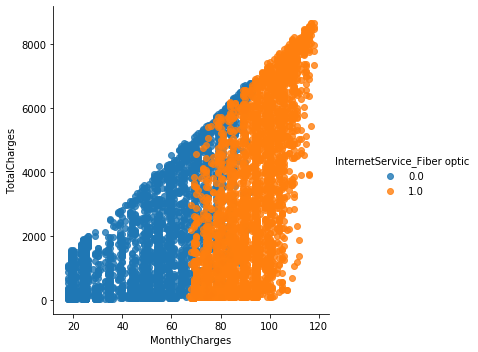

In [149]:
ax=sns.lmplot(x='MonthlyCharges', y='TotalCharges',hue='InternetService_Fiber optic' , data=df, fit_reg=False)

Посмотрим распределение для категориальных признаков.

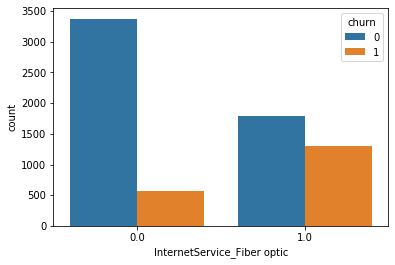

In [150]:
sns.countplot(x='InternetService_Fiber optic', hue='churn', data=df)

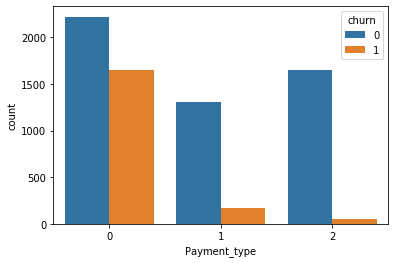

In [151]:
sns.countplot(x='Payment_type', hue='churn', data=df)

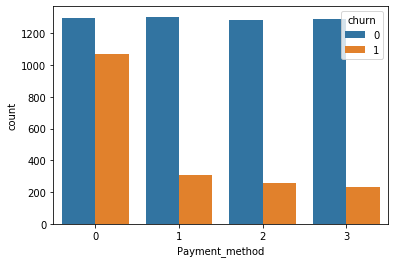

In [152]:
sns.countplot(x='Payment_method', hue='churn', data=df)

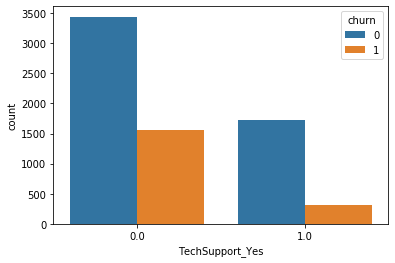

In [153]:
sns.countplot(x='TechSupport_Yes', hue='churn', data=df)

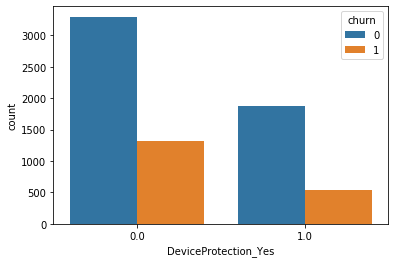

In [154]:
sns.countplot(x='DeviceProtection_Yes', hue='churn', data=df)

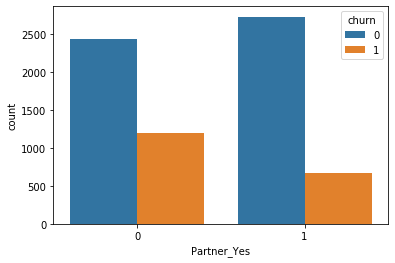

In [155]:
sns.countplot(x='Partner_Yes', hue='churn', data=df)

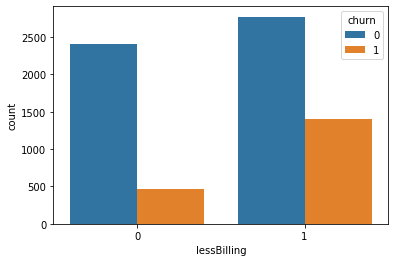

In [156]:
sns.countplot(x='lessBilling', hue='churn', data=df)

Важными параметрами для наших моделей могут быть TechSupport_Yes Payment_method Payment_type InternetService_Fiber optic MonthlyCharges

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
C графиками - чётко. Напомню только, чтографический анализ - это предположение/гипотеза. И чтобы её подтвердить или опровергнуть также следует применять аналитические методы анализа из области "проверка гипотез".
</div>

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Ну тут же не было задания проверять гипотезы. Я поэтому и писала как вопрос тимлиду, есть ли какие-то предположения заказчика о важных факторах влияния на отток, которые нужно проверить. + Когда я сделала проверку гипотез в одном проекте, где про это не просили, мне сказали, что это задание уже удалили и не хорошо так делать. Можем проверить гипотезs про факторы, которые на графиках выглядят как влияющие на цлевой признак, но по хорошему нам нужно тут делать поправку на множественные сравнения, если бы наша бизнес задача была не предсказание оттока, а выявления ключевых факторов.
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>да задания не было. Просто указал как факт на твои будущие проекты.
</div>

In [157]:
results = st.ttest_ind(df['InternetService_Fiber optic'], df['churn'])
print('p-значение:', results.pvalue)

p-значение: 1.458244702037857e-105


In [158]:
results = st.ttest_ind(df['Partner_Yes'], df['churn'])
print('p-значение:', results.pvalue)

p-значение: 5.502843378141761e-161


In [159]:
results = st.ttest_ind(df['DeviceProtection_Yes'], df['churn'])
print('p-значение:', results.pvalue)

p-значение: 3.624451654150017e-24


P-value меньше 0,05, следовательно можно отвергнуть нулевую гипотезу о равенстве числа ушедших пользователей, которые пользуются оптоволоконным интернетом/имеют партнера/защищают свои девайсы и нет. Значит гипотеза о влиянии этих факторов на отток верна. 

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ок)с гипотезами - ок. Можно использовать параметры: alternative='two-sided', и equal_var
</div>

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Построим матрицу корреляций, чтобы посмотреть какие признаки можно удалить.
</div>

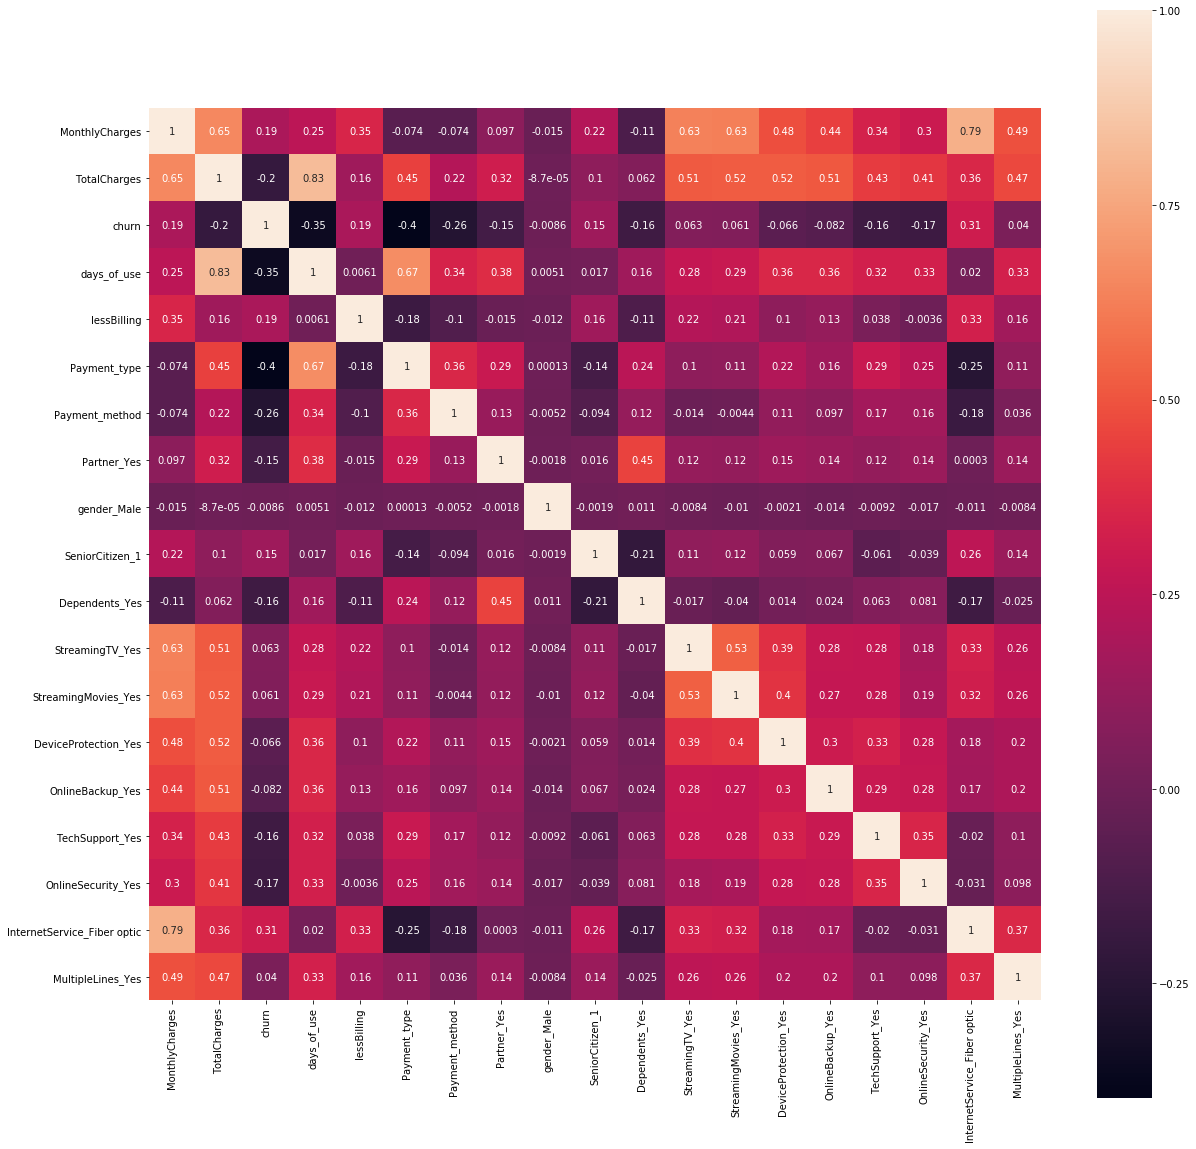

In [160]:
cor_columns = df.columns.drop('customerID','EndDate')
correlation = df[cor_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.show()


In [161]:
correlation[correlation > 0.7]

,MonthlyCharges,TotalCharges,churn,days_of_use,lessBilling,Payment_type,Payment_method,Partner_Yes,gender_Male,SeniorCitizen_1,Dependents_Yes,StreamingTV_Yes,StreamingMovies_Yes,DeviceProtection_Yes,OnlineBackup_Yes,TechSupport_Yes,OnlineSecurity_Yes,InternetService_Fiber optic,MultipleLines_Yes
MonthlyCharges,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.787069,NaN
TotalCharges,NaN,1.000000,NaN,0.826095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_of_use,NaN,0.826095,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lessBilling,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment_type,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment_method,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> В наших признаках только две сильные корреляции. Fiber optic и MonthlyCharges - 0.78 и TotalCharges и days_of_use - 0.82. Попробуем обучить модели только с одним из этих пар признаков.
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ок.
</div>

In [162]:
df_final = df.drop(['EndDate','customerID','BeginDate'], axis =1)

In [163]:
df_final_less_feat = df_final.drop(['MonthlyCharges','TotalCharges'], axis =1)

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.
</div>

# Выбор моделей

Разделим выборку на тренировочну, тестовую и валидационную, сделаем стратификацию, чтобы равномерно расспределить целевой признак во всех группах.

In [164]:
features = df_final.drop(['churn'], axis =1)
target = df_final['churn']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345,stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [165]:
features_less = df_final_less_feat.drop(['churn'], axis =1)
target_less = df_final_less_feat['churn']

features_train_less, features_test_less, target_train_less, target_test_less = train_test_split(
    features_less, target_less, test_size=0.2, random_state=12345,stratify=target_less)

features_train_less, features_valid_less, target_train_less, target_valid_less = train_test_split(
    features_train_less, target_train_less, test_size=0.25, random_state=12345, stratify=target_train_less)

In [166]:
print(len(features))
print(len(features_train)+len(features_test)+len(features_valid))

7043
7043


In [167]:
print(target_test.mean())
print(target_train.mean())
print(target_valid.mean())

0.2654364797728886
0.26532544378698225
0.2654364797728886


<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ок
</div>

## LogisticRegression

Попробуем вначале использовать алгоритм логистической регрессии, так как у него есть аргумент class_weight и мы можем указать, что нам необходмо сбалансировать вес классов.

In [168]:
model_reg = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_reg.fit(features_train, target_train)
predicted_valid = model_reg.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.6555671175858481

In [169]:
model_reg_less = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_reg_less.fit(features_train_less, target_train_less)
predicted_valid_less = model_reg_less.predict(features_valid_less)
f1_score(target_valid, predicted_valid)

0.6555671175858481

In [170]:
roc_auc_score_reg = roc_auc_score(target_test, model_reg.predict_proba(features_test)[:, 1])
roc_auc_score_reg

0.830978583791883

In [171]:
roc_auc_score_reg_less = roc_auc_score(target_test_less, model_reg_less.predict_proba(features_test_less)[:, 1])
roc_auc_score_reg_less

0.8289570900824099

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
есть первый результат.
</div>

## Decision Tree Classifier

In [172]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(features_train_less, target_train_less)
predicted_valid = model_dt.predict(features_valid_less)
accuracy_score(target_valid_less,predicted_valid)

0.7764371894960965

In [173]:
roc_auc_score_tree = roc_auc_score(target_test_less, model_dt.predict_proba(features_test_less)[:, 1])
roc_auc_score_tree

0.7156242734247849

Метрика ниже чем у логистической регрессии. Попробуем лучше подобрать гиперпараметры.

In [174]:
frames_features = [features_train_less,features_valid_less]
frames_target = [target_train,target_valid_less]
train_val_features = pd.concat(frames_features)
train_val_target = pd.concat(frames_target)

In [175]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,20)}

In [176]:
GridSearchCV_tree = GridSearchCV(model_dt, parametrs, cv=5)
GridSearchCV_tree.fit(train_val_features, train_val_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             pre_dispat

In [177]:
GridSearchCV_tree.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [178]:
best_tree_model = GridSearchCV_tree.best_estimator_
predictions_tree = best_tree_model.predict(features_test_less)
accuracy_score(target_test_less,predictions_tree)

0.8041163946061036

In [179]:
roc_auc_score_tree = roc_auc_score(target_test_less, best_tree_model.predict_proba(features_test_less)[:, 1])
roc_auc_score_tree

0.8392570203311892

Боллее оптимальные параметры помогли нам улучшить roc_auc_score_tree нашей модели до 83, но это не лучше, чем баховая модель логистической регрессии.  Для лучшего понимания, как работает наша модель посчитаем для нее метрики precision(точность) и recall(полнота). 

In [180]:
precision_score(target_test_less, predictions_tree)

0.6376404494382022

In [181]:
recall_score(target_test_less, predictions_tree)

0.606951871657754

In [182]:
f1_score_tree = f1_score(target_test_less,predictions_tree)
f1_score_tree

0.6219178082191781

Возможно это качество модели плохое из-за того, что полнота нашей модели достаточно низкая, то есть не всех клиентов, которые собираются уйти от нас мы правильно определяем. А мы помним, что нам самое главное для нас в этой задаче предотвратить уход клиентов, то есть нам не так страшно совершить false positive ошибку, чем false negative. Посмотрим как расспределены вероятности внутри нашей модели.

In [183]:
target_predicted_probability = best_tree_model.predict_proba(features_test_less)

Text(0, 0.5, 'Number of observations')

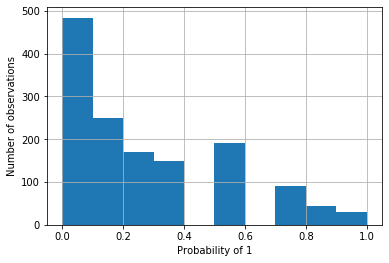

In [184]:
ax = pd.Series(target_predicted_probability[ :, 1]).hist()
ax.set_xlabel('Probability of 1')
ax.set_ylabel('Number of observations')

In [185]:
predictions_new =np.where(target_predicted_probability[ :, 1] > 0.3, 1, 0)

In [186]:
f1_score_tree_thr= f1_score(target_test_less,predictions_new)
f1_score_tree_thr

0.6220204313280364

In [187]:
roc_auc_score_tree_thr = roc_auc_score(target_test_less, predictions_new)
roc_auc_score_tree_thr

0.7537497739543776

Если бы нас просили оптимизировать f1_score, то такой подход бы нам немного помог, но в данном случае, такой способ оказался бессполезен.

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
В нашем деле любой неудачный результат - ещё один шаг к успеху!
</div>

## Random Forest

In [188]:
model_forest = RandomForestClassifier(random_state=1234)

In [189]:
parametrs = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1,2,3, 5,7], 'min_samples_split': [2, 4, 6, 8]}

In [190]:
from sklearn.model_selection import GridSearchCV
GridSearchCV_rf = GridSearchCV(model_forest, parametrs, cv=3)
GridSearchCV_rf.fit(train_val_features, train_val_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=1234, verbose=0,
                                              warm_start=False),
             iid

In [191]:
GridSearchCV_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 90}

In [192]:
best_forest_model = GridSearchCV_rf.best_estimator_

In [193]:
predictions_valid_forest = best_forest_model.predict(features_valid_less)
accuracy_score(target_valid_less,predictions_valid_forest)

0.8772178850248403

In [194]:
f1_score_forest = f1_score(target_test_less, predictions_valid_forest)
f1_score_forest

0.19482496194824964

In [195]:
roc_auc_score_forest = roc_auc_score(target_test_less, best_forest_model.predict_proba(features_test_less)[:, 1])

In [196]:
roc_auc_score_forest

0.848701852282415

In [197]:
features_importance = best_forest_model.feature_importances_

In [198]:
features_importance_df = pd.DataFrame({'features': list(features_train_less),
                                       'features_importance': features_importance})

In [199]:
features_importance_df.sort_values('features_importance', ascending=False)

,features,features_importance
0,days_of_use,0.330253
2,Payment_type,0.174562
14,InternetService_Fiber optic,0.112426
3,Payment_method,0.095675
1,lessBilling,0.033379
13,OnlineSecurity_Yes,0.025876
9,StreamingMovies_Yes,0.025591
12,TechSupport_Yes,0.025574
15,MultipleLines_Yes,0.024704
8,StreamingTV_Yes,0.023610


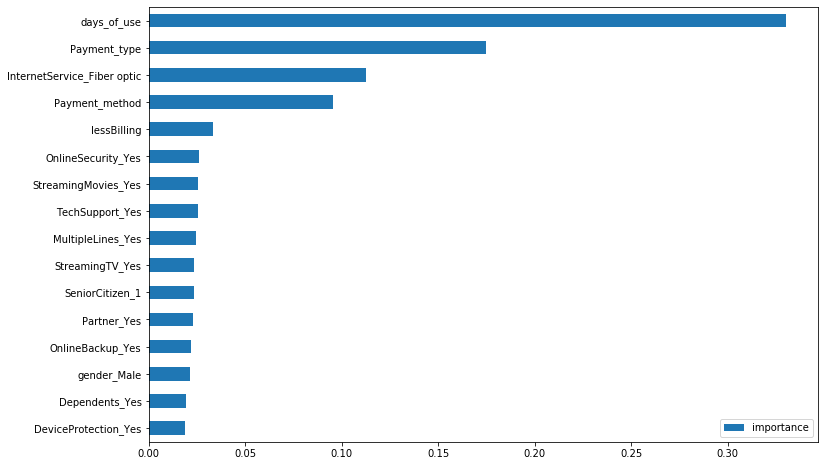

In [200]:
imp = pd.DataFrame(best_forest_model.feature_importances_, index=features_train_less.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Метрика для случайного леса выше, чем у регрессии и дерева решений.

## CatBoostClassifier

In [201]:
cat_columns = ['Partner_Yes','days_of_use','Payment_type','lessBilling','Payment_method','InternetService_Fiber optic']
features_train_cb = features_train[cat_columns].astype(int)
features_test_cb = features_test[cat_columns].astype(int)
train_pool = Pool(features_train_cb, target_train, cat_features = cat_columns)
test_pool = Pool(features_test_cb, target_test, cat_features = cat_columns)

In [202]:
model_cb = CatBoostClassifier(iterations=200,learning_rate=0.1, eval_metric = 'AUC') 

model_cb.fit(train_pool)

0:	total: 3.56ms	remaining: 707ms
1:	total: 7.9ms	remaining: 782ms
2:	total: 10.4ms	remaining: 682ms
3:	total: 32.1ms	remaining: 1.57s
4:	total: 34.4ms	remaining: 1.34s
5:	total: 37.1ms	remaining: 1.2s
6:	total: 40ms	remaining: 1.1s
7:	total: 42.6ms	remaining: 1.02s
8:	total: 50.9ms	remaining: 1.08s
9:	total: 131ms	remaining: 2.49s
10:	total: 134ms	remaining: 2.29s
11:	total: 136ms	remaining: 2.14s
12:	total: 139ms	remaining: 1.99s
13:	total: 142ms	remaining: 1.89s
14:	total: 228ms	remaining: 2.82s
15:	total: 232ms	remaining: 2.67s
16:	total: 234ms	remaining: 2.52s
17:	total: 238ms	remaining: 2.4s
18:	total: 246ms	remaining: 2.34s
19:	total: 327ms	remaining: 2.94s
20:	total: 329ms	remaining: 2.81s
21:	total: 332ms	remaining: 2.68s
22:	total: 335ms	remaining: 2.58s
23:	total: 338ms	remaining: 2.48s
24:	total: 425ms	remaining: 2.97s
25:	total: 439ms	remaining: 2.94s
26:	total: 444ms	remaining: 2.85s
27:	total: 524ms	remaining: 3.22s
28:	total: 526ms	remaining: 3.1s
29:	total: 529ms	remai

In [203]:
#roc_auc_score(target_test, model_cb.predict_proba(features_test))
#roc_auc_score_cb

<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Я не знаю, как это сделать через predict_proba, так как тогда нужно работать не черз Pool и размечать все фичи как категориальные и нет. Я так не умею ((( и мне очень тяжело дается документация кэтбуста. Если это принципиальный момент, то тогда я уже лучше  в академ и не буду пытаться фин проект в дедлайн((
</div>

In [204]:
target_predict_cb = model_cb.predict(test_pool)
roc_auc_score_cb = roc_auc_score(target_test, target_predict_cb)
roc_auc_score_cb

0.8625125939703944

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>упс... интересный разговор) Это же тебе надо...ты же столько времени и сил уже потратила. А тут же осталось самую малость... <br>А вопрос - реально принципиальный. Он может сильно повлиять на конечный результат и на твой успех, т.к. predict и predict_proba - разные истории.<br>
Только же зачем так про себя. Ведь у тебя же хороший проект. <br>
Можно раздельно , не через pool. Вот, например как ниже (c факторами разобраться ещё)
</div>

In [205]:
roc_auc_cb = roc_auc_score(target_test, model_cb.predict_proba(features_test_cb)[:, 1])
print(f"roc_auc для модели CatBoost на тестовой выборке: {roc_auc_cb:.3f}")

roc_auc для модели CatBoost на тестовой выборке: 0.950


<div style="background: #bdf9fc; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='green'><br> Уточни, пожалуйста, что сейчас от меня требуется сделать? В закоментированной ячейке видно,что я просто описалась передавала features_test вместо features_test_cb, поэтому получала ошибку.  График важности фичей сделала выше (в конце раздела рендом форест). Ниже такой же для кэтбуста.
</div>

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>
Настя, да ничего больше и не надо) Вот ниже позволил себе вывести результат в выходную табличку. Видно, что метрика на уровне 0,94 - и это победа на 6 баллов!<br>

Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)
</div>

In [206]:
features_importance_cb = model_cb.get_feature_importance(data=test_pool,
                       type=EFstrType.FeatureImportance)

In [207]:
features_importance_cb = pd.DataFrame({'features': list(features_test_cb),
                                       'features_importance': features_importance_cb})

In [208]:
features_importance_cb.sort_values('features_importance', ascending=False)

,features,features_importance
1,days_of_use,57.876629
2,Payment_type,14.163501
4,Payment_method,11.483845
5,InternetService_Fiber optic,10.781893
3,lessBilling,4.135498
0,Partner_Yes,1.558634


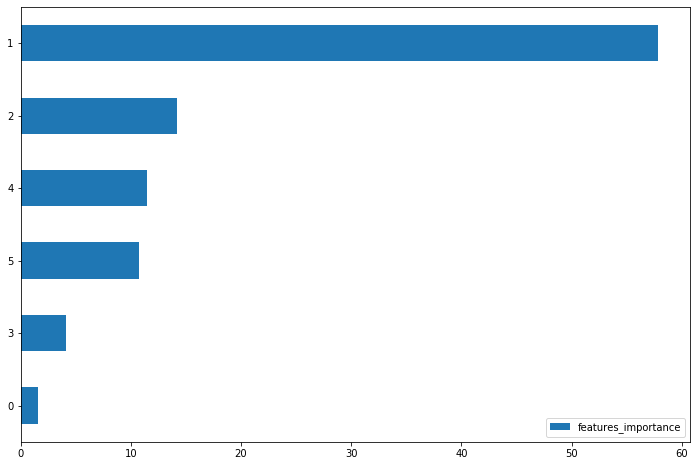

In [209]:
features_importance_cb.sort_values('features_importance').plot(kind='barh', figsize=(12, 8))

## Финальная таблица

In [211]:
models_info = pd.DataFrame(columns = ['model_type', 'auc-roc'])
models_info.loc[0, 'model_type'] = 'Logreg'
models_info.loc[0, 'auc-roc'] = roc_auc_score_reg

models_info.loc[1, 'model_type'] = 'DecisionTree'
models_info.loc[1, 'auc-roc'] = roc_auc_score_tree

models_info.loc[2, 'model_type'] = 'RandomForest'
models_info.loc[2, 'auc-roc'] = roc_auc_score_forest

models_info.loc[3, 'model_type'] = 'CatBoost'
models_info.loc[3, 'auc-roc'] = roc_auc_score_cb


models_info.loc[4, 'model_type'] = 'CatBoost_2'          # РЕВЬЮЕР
models_info.loc[4, 'auc-roc'] = roc_auc_cb               # РЕВЬЮЕР

models_info

,model_type,auc-roc
0,Logreg,0.830979
1,DecisionTree,0.839257
2,RandomForest,0.848702
3,CatBoost,0.862513
4,CatBoost_2,0.949757


Значение метрики удовлетворительное, но не максимально. Если бы было больше времени, можно было бы использовать feature_selection для оптимизации работы кэктбуста.

## Общий вывод

- Мы подготовили данные, преобразовали категориальные признаки(например, наличие услуги) в численные.Составили единую таблицу фичей (информация о договоре, клиенте, интернет-услугах и услугах телефонии) и целевого признака (столбец 'EndDate').
- Провели исследовательский анализ.
- Обучить на четыре модели: линейная регрессия, DecisionTree, Random Forest и CatBoost.Подборали оптимальные гиперпараметры для моделей.
- Сравнить эффективность разных моделей на тестовой выборке. Получили удовлетворительную метрику для CatBoost и Random Forest.

<div class="alert alert-success">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Настя, скажу честно, уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стала гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>


Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования:<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

<font color='red'>
Есть пару-тройку вопросов для дополнений:<br>
1)При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>
2) Будет здорово, если построишь график важности факторов.<br>
    
И по метрике: в лесу есть использование predict_proba() - это верно. ВОт в кэтбусте - лучше также!    
<font color='green'>
Однозначно видно, что ты технически сделала хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>
    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.
</div>